In [1]:
#utils
import numpy as np
import pandas as pd
import itertools
#time
import datetime
import mjd_data as mjd
#plot
import matplotlib.pyplot as plt
import seaborn as sns
#AVAR
import allantools as allt



## Data extraction and formatting

In [2]:
# Reading the file data
data = []

with open("clock_data/clock.txt","r") as f:
    while True:
        line = f.readline()
        if not line:
            break
        line = line.split()
        if(len(line)>1):
            data.append(line)
            
# according to documentation           
col_names = ["mjd","lab_code","ta_code","utc-ta","clk1_code","utc-clk1","clk2_code","utc-clk2","clk3_code","utc-clk3","clk4_code","utc-clk4"]

# creating numeric datafrqme
data = pd.DataFrame(data=data,columns=col_names)
data = data.apply(pd.to_numeric)

# removing redundant column
data.drop('lab_code', axis=1, inplace=True)
data["date"] = data["mjd"]
data["date"]=data["mjd"].apply(lambda x:"{}/{}/{:.0f}".format(*mjd.mjd_to_date(x)))
data

,mjd,ta_code,utc-ta,clk1_code,utc-clk1,clk2_code,utc-clk2,clk3_code,utc-clk3,clk4_code,utc-clk4,date
0,59219,20001,167616.3,1352804,18201.5,1353765,20225.6,1352027,8785.7,1352609,7258.5,2021/1/5
1,59219,1352985,-7494.1,1350909,62513.9,1351258,34153.2,1351178,20556.5,1353262,88579.3,2021/1/5
2,59219,1350355,1223.6,1351321,-8517.0,1352388,-5657.6,1412056,70811.8,1411077,-100964.7,2021/1/5
3,59219,1411086,177735.2,1411082,86570.2,1411002,-73085.5,1353054,49083.5,1351029,8170.4,2021/1/5
4,59219,1353530,-1167.5,1350157,19466.9,1400890,31750.6,1400810,721.6,1400889,6156.2,2021/1/5
5,59219,1400809,540.1,1411037,-608.8,0,0.0,0,0.0,0,0.0,2021/1/5
6,59224,20001,167615.8,1352804,18241.3,1353765,20385.1,1352027,8851.8,1352609,7241.1,2021/1/10
7,59224,1352985,-7539.8,1350909,62571.7,1351258,34263.7,1351178,20723.2,1353262,88595.5,2021/1/10
8,59224,1350355,1302.8,1351321,-8558.2,1352388,-5603.8,1412056,71751.4,1411077,-101343.3,2021/1/10
9,59224,1411086,178380.4,1411082,86964.8,1411002,-73660.4,1353054,49246.6,1351029,8249.5,2021/1/10


We see that the sampling is made at regular intervals of 5 days fora total of 6 time samples. 

**Note:** since the interval is regular, for some plots the  x values used are the integers from 0 to 5. this does not change the proportions, but is taken in to account to calculate time intervals 

according to documentation, for each clock i the **behavior (phase) $\phi_i$** is defined by:
$$(UTC_{Lab} - UTC_{Ref}) - (UTC_{Lab} - Clock_{i}) = (Clock_{i} - UTC_{Ref}) = \phi_i$$

In [3]:
nsfactor = 10**(-9)
data["behavior1"] = (data["utc-ta"]-data["utc-clk1"])#*nsfactor
data["behavior2"] = (data["utc-ta"]-data["utc-clk2"])#*nsfactor
data["behavior3"] = (data["utc-ta"]-data["utc-clk3"])#*nsfactor
data["behavior4"] = (data["utc-ta"]-data["utc-clk4"])#*nsfactor

days = data["date"].unique()
labs = data["ta_code"].unique()
clks = ["clock 1","clock 2","clock 3","clock 4"]

## Naive analysis on the clock data

This is an analysis i did over the clock data before knowing I was expected to use Allan variance. I use conventional methods for studying and visualizing the data such as correlation.

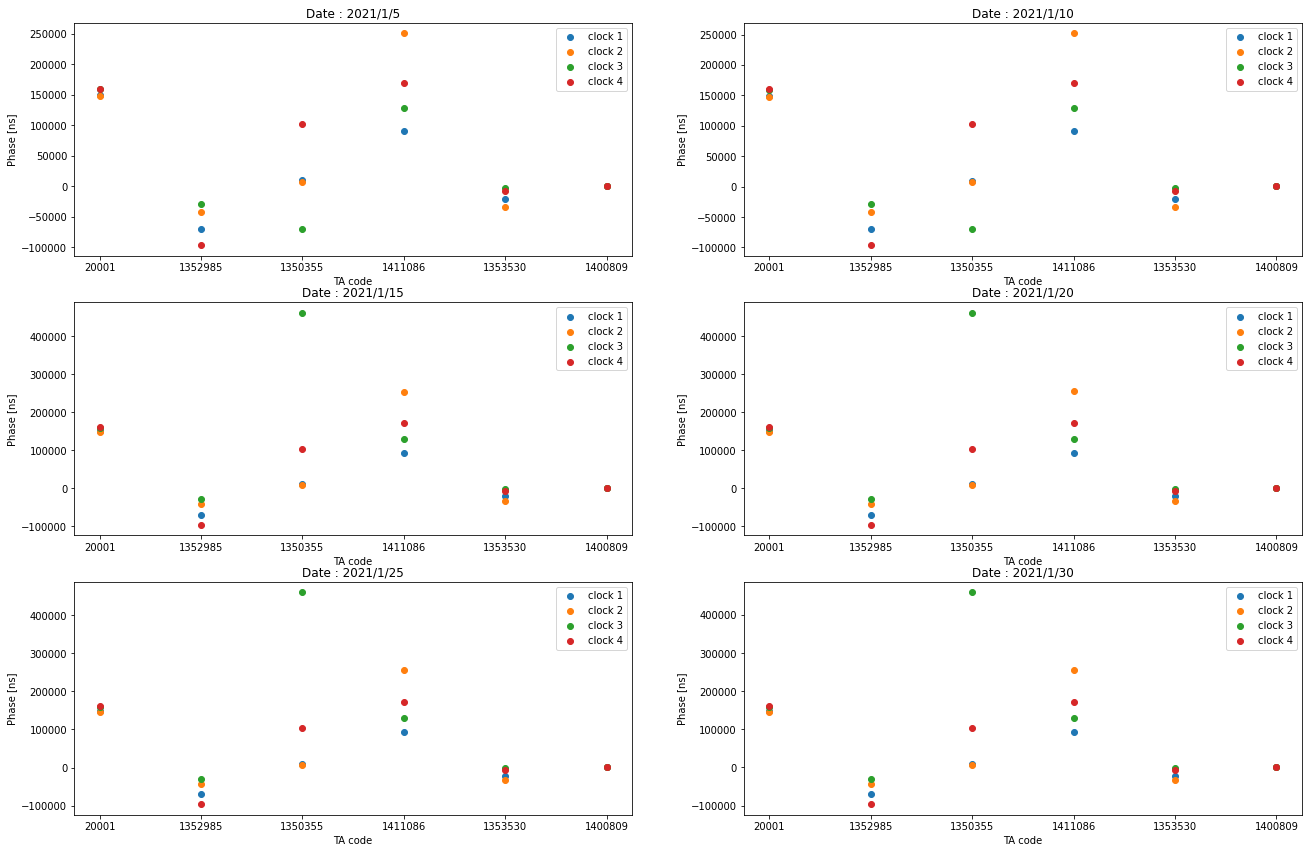

In [4]:
"""
create a dictionary with an item for each clock, containing
the correlation data in with every other clock.

A scatter plot of the different datapoints (ta_code) for each MJD is 
generated in the same loop filling the dictionary.

The TA codes are NOT a timestamp (so representing each clock 
with a line connecting these points might be misleading) 
BUT the data can be interpreted as signal in order to interpret 
correlations among different clocks
"""

# corr data 
corr_data_per_clock = {x:{y:np.zeros(len(days)) for y in clks if x!=y} for x in clks}



plt.figure(figsize=(22,len(days)*5))
#lt.suptitle("Plot A : Behavior per clock for each MJD",fontsize=18)

# for each MJD
for i in range(len(days)):
    plt.subplot(len(days),2,i+1)
    plt.title("Date : {}".format(days[i]))
    
    y1 = data[data["date"]==days[i]]["behavior1"]
    y2 = data[data["date"]==days[i]]["behavior2"]
    y3 = data[data["date"]==days[i]]["behavior3"]
    y4 = data[data["date"]==days[i]]["behavior4"]
    
    # create correlation matrix with B values of all 4 clocks for this MJD
    clocks = np.array([list(y1),list(y2),list(y3),list(y4)]).T
    clocks = pd.DataFrame(data=clocks,columns=clks)
    corr_clocks = clocks.corr()
    
    # for each clokc; save the correlations with everyother clock (auto corr = 1)
    for cl1 in clks:
        for cl2 in clks:
            if(cl1!=cl2):
                corr_data_per_clock[cl1][cl2][i] = corr_clocks[cl1][cl2]

    
    x = np.arange(6)
    plt.xticks(ticks=x,labels=data["ta_code"].unique())
    
    
    plt.scatter(x,y1,label="clock 1")
    plt.scatter(x,y2,label="clock 2")
    plt.scatter(x,y3,label="clock 3")
    plt.scatter(x,y4,label="clock 4")
    
    
    plt.xlabel("TA code")
    plt.ylabel("Phase [ns]")
    plt.legend(loc=1)

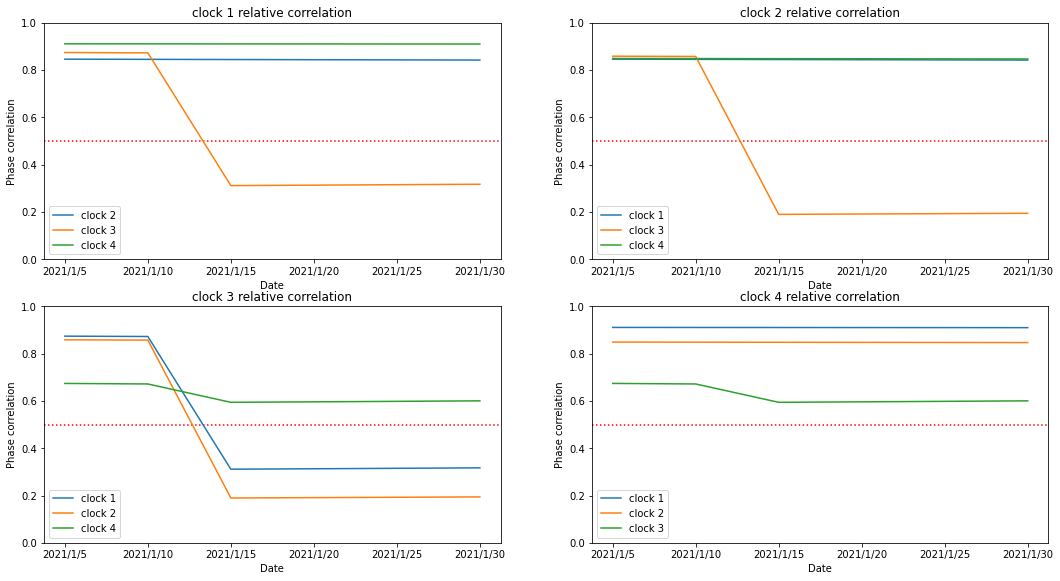

In [5]:
"""
Now, for each clock the correlation data with every other clock is traced in time MJD
"""
plt.figure(figsize=(18,20))
#plt.suptitle("Plot B : correlation between clocks in MJD time",fontsize=18)

for i in range(len(clks)):
    plt.subplot(len(clks),2,i+1)
    plt.title(clks[i]+" relative correlation")
    plt.xticks(ticks=np.arange(len(days)),labels=days)
    plt.ylim(0,1)
    plt.xlabel("Date")
    plt.ylabel("Phase correlation")
    plt.axhline(0.5,c="r",linestyle=":")
    
    
    for c in clks:
        if(c!=clks[i]):
            plt.plot(corr_data_per_clock[clks[i]][c],label=c)
            
    plt.legend(loc=3)
    
    
    

Is evident that the clock 3 lose correlation with the other clocks in the MJD = 59229 (2021/01/15). This implies that for this day the clock started diverging in behavior, thus increasing it's relative phase with respect to the reference clock

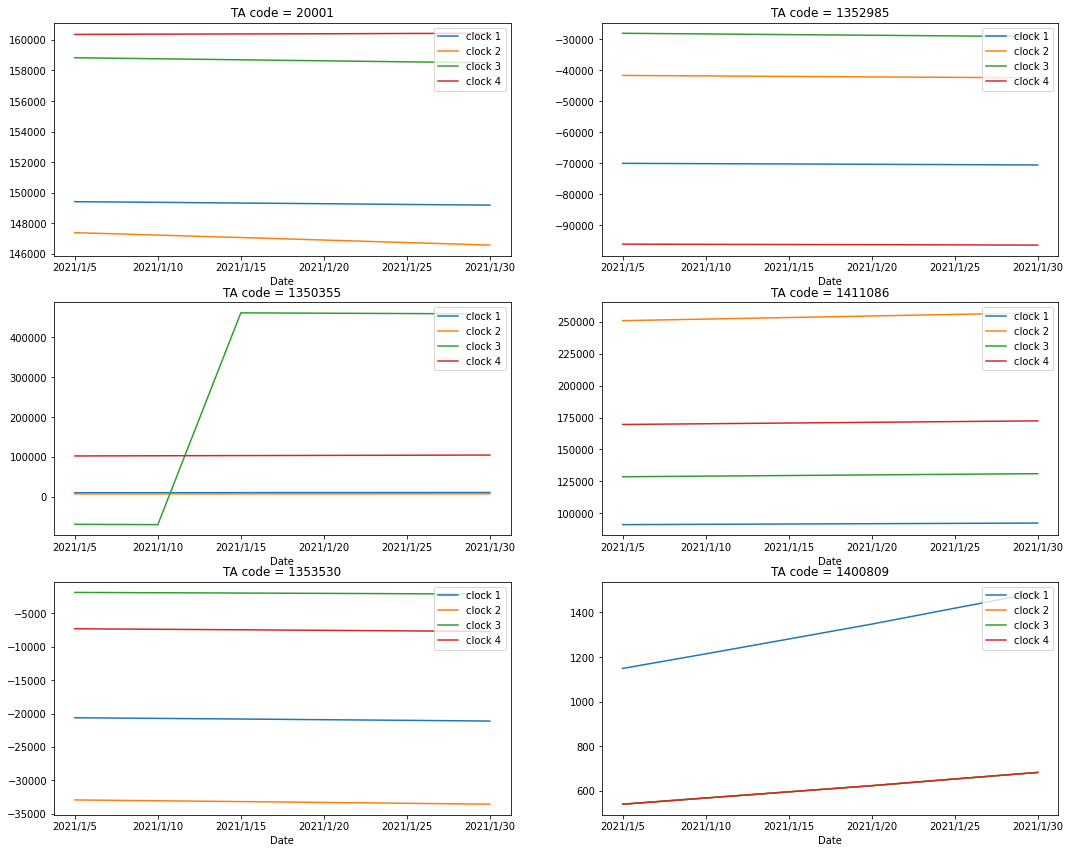

In [6]:
plt.figure(figsize=(18,len(labs)*5))
#plt.suptitle("Plot C : Behavior per clock for each TA code",fontsize=18)
for i in range(len(labs)):
    plt.subplot(len(labs),2,i+1)
    plt.title("TA code = {}".format(labs[i]))
    y1 = data[data["ta_code"]==int(labs[i])]["behavior1"]
    y2 = data[data["ta_code"]==int(labs[i])]["behavior2"]
    y3 = data[data["ta_code"]==int(labs[i])]["behavior3"]
    y4 = data[data["ta_code"]==int(labs[i])]["behavior4"]
    

    
    plt.xticks(ticks=np.arange(len(days)),labels=days)
    plt.plot(x,y1,label="clock 1")
    plt.plot(x,y2,label="clock 2")
    plt.plot(x,y3,label="clock 3")
    plt.plot(x,y4,label="clock 4")
    plt.legend(loc=1)
    plt.xlabel("Date")

In the plot for TA code = 1350355 we can notice the divergent point, which is not present in the other TA codes. This was evident as well in plot A when the curve for clock 3 starts diverging in this point from MJD = 59229. Note that for TA code = 1400809 the values of B are increasing for each clock implying a possible flaw in the experimentation conditions given the non-steady value (in the case that steady behavior is wanted). The slope of this reprsentation may show how the relative phase of this clock is changing over time.

Phase gain : 13.632 ns/day
Time to increase the phase in 1 second: 200977 years


Text(0.5, 1.0, 'Relqtive phase of clock 1 TA = 1400809')

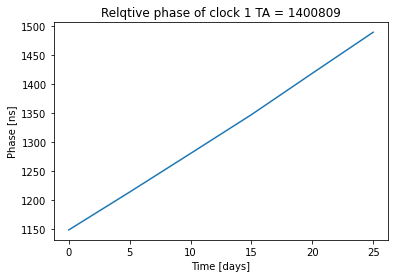

In [7]:
delta_t = 5 #(days) . interval of time between measurements
y = data[data["ta_code"]==int(1400809)]["behavior1"].values # TA code 1400809 for clock 1
gain = np.mean([(y[i]-y[i-1])/delta_t for i in range(1,len(y))])
print("Phase gain :" ,gain,"ns/day")
print("Time to increase the phase in 1 second:" ,int((1/(gain*nsfactor))/365),"years")
plt.plot(delta_t*x,y)
plt.xlabel("Time [days]")
plt.ylabel("Phase [ns]")
plt.title("Relqtive phase of clock 1 TA = 1400809")


#### Autocorrelation 

In [8]:
def lagged_auto_cov(Xi,t):
    """
    for series of values x_i, length N, compute empirical auto-cov with lag t
    defined: 1/(N-1) * \sum_{i=0}^{N-t} ( x_i - x_s ) * ( x_{i+t} - x_s )
    """
    N = len(Xi)

    # use sample mean estimate from whole series
    Xs = np.mean(Xi)

    # construct copies of series shifted relative to each other, 
    # with mean subtracted from values
    end_padded_series = np.zeros(N+t)
    end_padded_series[:N] = Xi - Xs
    start_padded_series = np.zeros(N+t)
    start_padded_series[t:] = Xi - Xs

    auto_cov = 1./(N-1) * np.sum( start_padded_series*end_padded_series )
    return auto_cov

def lagged_auto_corr(Xi,t):
    return lagged_auto_cov(Xi,t)/lagged_auto_cov(Xi,0)
def cycle_per_day_to_Hz(val):
    sec_p_day = 3600*24
    return val/(sec_p_day)


## Article approach
#### "Determination of Allan deviation od Cesium atomic clock for lower averaging time" (P. Banerjee et al.)




### For 3 clocks

From the article recall that being $\sigma_{jk}^2(\tau)$ the Allan variance of clock j with respect to clock k, the independent (absolute) Allan variance of each clock can be found by intercomparing several clocks. This is since we can assume that in atomic clock noise is uncorrelated and that these values are relative:
$$\sigma_{jk}^2(\tau) = \sigma_{j}^2(\tau) + \sigma_{k}^2(\tau)$$
Therefore, there exist ${N}\choose{2}$ combinations of the form $\sigma_{jk}^2(\tau)$ for N clocks, giving 6 combinations taking into account the 4 clocks in the data. The allan variance is defined with $\tau$ = 1 step = 5 days given that is theonly scale avilable  with only 6 time steps provided.

Solving the system of equations is easier with linear algebra. The Matrix A converting the vector of absolute variances $\{\sigma_i^2(t)\}$ to the vector of relative variances $\{\sigma_{ij}^2(t)\}$ has dimension Nx$N\choose{2}$ therefore is not always squared. Remember that, having the relative variances, we are interested in the inverse of this matrix A so is possible to retrieve the absolute variances.  For the situation in the article with 3 clocks is easy since the Matrix A is a squared matrix i.e. ${3}\choose{2} $= 3 = N. 

For this case with 4 clocks, the matrix A has dimensions mxn = 4x6 and is a full rank matrix since the rank of A is 4 = min(m,n). given this, the Left inverse of the matrix is:

$$A^{−1}_{left}=(A^⊤A)^{−1}A^⊤$$

so that:

$$A^{−1}_{left}\sigma_{ij}^2(t) =\sigma_{i}^2(t)$$

The Relative variances $\sigma_{ij}^2$ are estimated with the relative phase between clocks $\phi_{ij}$:
$$\phi_i-\phi_j = (Clock_{i} - UTC_{Ref}) - (Clock_{j} - UTC_{Ref})=(Clock_{i} - Clock_{j}) = \phi_{ij}$$

In [21]:
Nclocks =3
#generate all combinations of pair of indexes in the N clocks (idx1,idx2)
combs = list(itertools.combinations(np.arange(Nclocks), 2))
# a non squared matrix A to convert the vector of absolute variances sigma_i to the vector of relative 
# variances sigma_ij  
matA = np.zeros([Nclocks,len(combs)])

# for each combination pair ij , assign 1 to the indexes i and j of the row 
# corresponding to sigma_ij in matrix A since sigma_ij = sigma_i+sigma_j 
for i in range(len(combs)):       
    matA[combs[i][0],i] = 1
    matA[combs[i][1],i] = 1
matA = matA.T
print("Rank A :",np.linalg.matrix_rank(matA))

# Left inverse
matA_inv = np.dot(np.linalg.inv(np.dot(matA.T,matA)),matA.T)

Rank A : 3


In [10]:
# calculating relative variances
variances_data = []
for l in range(len(labs)):
    ta_code = labs[l]
    #print("TA code : ",ta_code)
    rel_variances = np.zeros([len(combs)])
    for i in range(len(combs)):
        #indexes
        c1 = combs[i][0]
        c2 = combs[i][1]
        
        # phase data of the selected clocks
        y1 = data[data["ta_code"]==int(ta_code)]["behavior{}".format(c1+1)].values
        y2 = data[data["ta_code"]==int(ta_code)]["behavior{}".format(c2+1)].values

        # relative phase
        y_rel = y1-y2

        #allan variance with phase data
        taus,odev,e_odev,ns= allt.oadev(y_rel,rate=cycle_per_day_to_Hz(1/5),taus="decade",data_type="phase")
        
        #append allan variance to relative variances
        rel_variances[i] = odev[0]
        

    #calculate absolute variances by multiplyingby the left with the left inverse of A
    abs_variances = np.dot(matA_inv,rel_variances)
    
    #new row of table
    line = [ta_code]
    
    for i in range(len(combs)):
        line.append(rel_variances[i])
        #print("  sigma_{}{}² = {} ns²".format(combs[i][0]+1,combs[i][1]+1,rel_variances[i]))

    for i in range(len(abs_variances)):
        line.append(abs_variances[i])
        #print("  sigma_{}² = {} ns²".format(i+1,abs_variances[i]) , "<<<" if abs_variances[i]<0 else " - ")
    variances_data.append(line)

#columns names
cols = ["ta_code"]+["sigma_{}{}".format(combs[i][0]+1,combs[i][1]+1) for i in range(len(combs))]+["sigma_{}".format(i+1) for i in range(Nclocks)]

#make dataframe
variances_data = pd.DataFrame(data=variances_data,columns=cols)

In [11]:
variances_data

,ta_code,sigma_12,sigma_13,sigma_23,sigma_1,sigma_2,sigma_3
0,20001,0.000013,0.000012,4.823071e-06,0.000010,2.835769e-06,1.987302e-06
1,1352985,0.000022,0.000021,2.312919e-05,0.000010,1.180420e-05,1.132499e-05
2,1350355,0.000019,0.617008,6.170141e-01,0.000006,1.283349e-05,6.170013e-01
3,1411086,0.000003,0.000017,1.671041e-05,0.000001,1.398741e-06,1.531167e-05
4,1353530,0.000015,0.000014,6.178865e-07,0.000014,5.823947e-07,3.549172e-08
5,1400809,0.000002,0.000002,0.000000e+00,0.000002,2.117582e-22,0.000000e+00


In [12]:
#melted dataframe for plotting
vardat_melt= variances_data.melt(id_vars=["ta_code"])

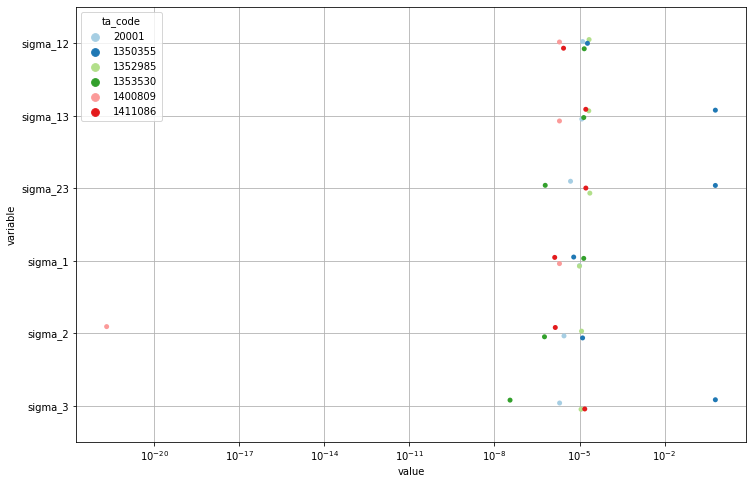

In [13]:
plt.figure(figsize=(12,8))
sns.stripplot(x="value", y="variable", hue="ta_code",
              data=vardat_melt,palette="Paired")
plt.xscale("log")
plt.grid()

In [22]:
# print the median and mean of deviation values
for i in range(Nclocks):
    print(np.median(variances_data["sigma_{}".format(i+1)]),np.mean(variances_data["sigma_{}".format(i+1)]))

8.087693447546969e-06 7.268918364874056e-06
2.1172546136656273e-06 4.909097975706405e-06
6.6561459470503066e-06 0.10283832441689389


#### Using the integrated function for "Three cornered Hat" available in AllanTools

In [23]:
t = np.logspace(0, 3, 50) 
# calculating relative variances
abs_variances = []
tau = []
for l in range(len(labs)):
    ta_code = labs[l]
    #print("TA code : ",ta_code)
    rel_phase = {}
    for i in range(len(combs)):
        #indexes
        c1 = combs[i][0]
        c2 = combs[i][1]
        name = "sigma_{}{}".format(c1+1,c2+1)
        # phase data of the selected clocks
        y1 = data[data["ta_code"]==int(ta_code)]["behavior{}".format(c1+1)].values
        y2 = data[data["ta_code"]==int(ta_code)]["behavior{}".format(c2+1)].values

        # relative phase
        y_rel = y1-y2
        
        #append relative phase 
        rel_phase[name] = y_rel
        

    #calculate absolute variances by multiplyingby the left with the left inverse of A
    
    abs_i = []
    for i in range(1,Nclocks+1):
        [j,k] = [x for x in range(1,Nclocks+1) if x != i]
        phase_ab = rel_phase["sigma_%d%d"%(np.min([i,j]),np.max([i,j]))]
        phase_ac = rel_phase["sigma_%d%d"%(np.min([i,k]),np.max([i,k]))]
        phase_bc = rel_phase["sigma_%d%d"%(np.min([j,k]),np.max([j,k]))]
        
        (taus,devA,err_a,ns_ab) = allt.three_cornered_hat_phase(phase_ab,phase_bc,phase_ac,1/5,"all", allt.oadev)
        for  tt in range(len(taus)):
            abs_variances.append([ta_code,"sigma_%d"%i,taus[tt],devA[tt],err_a[tt]])
    #new row of table
    line = [ta_code]
    
    for i in range(len(combs)):
        line.append(rel_variances[i])
        #print("  sigma_{}{}² = {} ns²".format(combs[i][0]+1,combs[i][1]+1,rel_variances[i]))

    for i in range(len(abs_variances)):
        line.append(abs_variances[i])
        #print("  sigma_{}² = {} ns²".format(i+1,abs_variances[i]) , "<<<" if abs_variances[i]<0 else " - ")
    variances_data.append(line)

#columns names
cols = ["ta_code","sigma","tau(days)","adev","err"]

#make dataframe
threehat_variances_data = pd.DataFrame(data=abs_variances,columns=cols)



In [24]:
threehat_variances_data

,ta_code,sigma,tau(days),adev,err
0,20001,sigma_1,5.0,1.036171,0.518085
1,20001,sigma_1,10.0,0.000000,0.000000
2,20001,sigma_2,5.0,0.407124,0.203562
3,20001,sigma_2,10.0,0.466208,0.329659
4,20001,sigma_3,5.0,0.088882,0.044441
5,20001,sigma_3,10.0,0.494444,0.349625
6,1352985,sigma_1,5.0,1.206482,0.603241
7,1352985,sigma_1,10.0,0.960989,0.679522
8,1352985,sigma_2,5.0,1.440017,0.720009
9,1352985,sigma_2,10.0,0.000000,0.000000


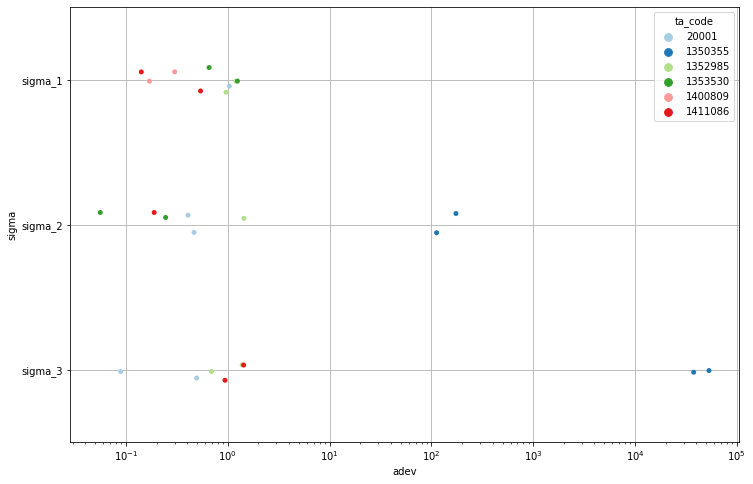

In [25]:
plt.figure(figsize=(12,8))
sns.stripplot(x="adev", y="sigma", hue="ta_code",
              data=threehat_variances_data,palette="Paired")
plt.xscale("log")
plt.grid()

<Figure size 432x288 with 0 Axes>

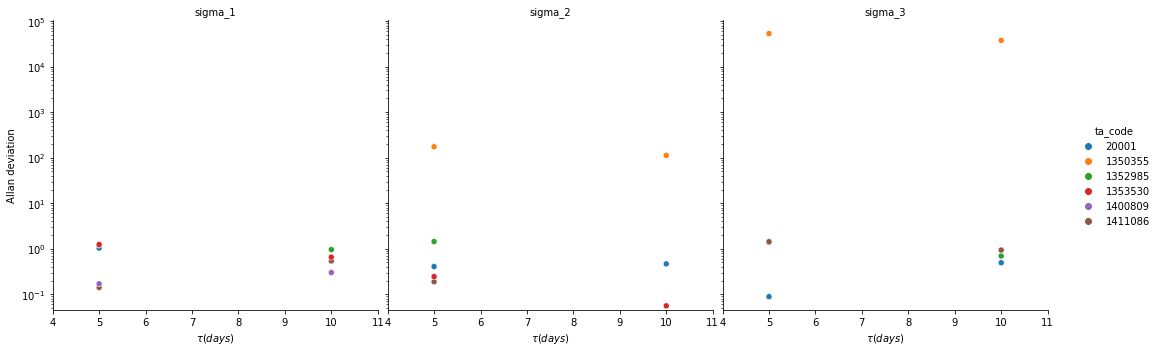

In [27]:
plt.figure()
g=sns.relplot(
    data=threehat_variances_data,
    x="tau(days)", y="adev",
    hue="ta_code", col="sigma",
    kind="scatter", palette="tab10",
    height=5, aspect=1, facet_kws=dict(sharex=False),
)

plt.yscale("log")
g.set(xlim=[4,11])
(g.map(plt.axhline, y=0, color=".7", dashes=(2, 1), zorder=0)
  .set_axis_labels("$\\tau (days)$", "Allan deviation")
  .set_titles("{col_name}")
  .tight_layout(w_pad=0))


<Figure size 432x288 with 0 Axes>

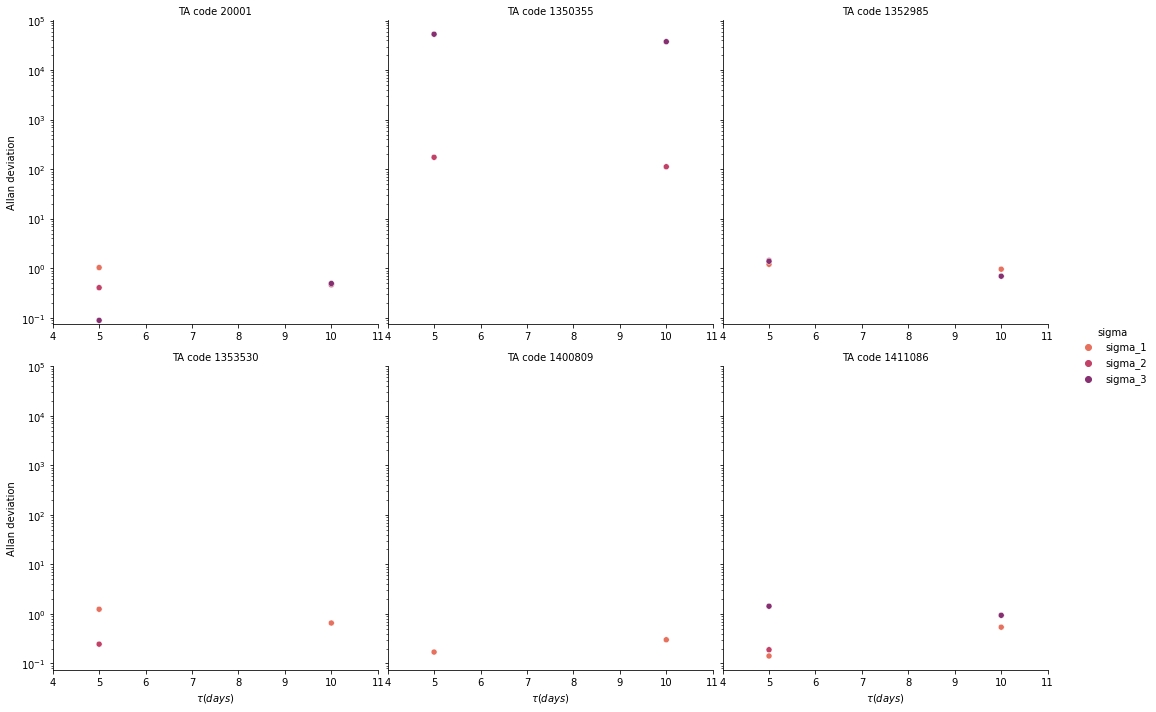

In [28]:
plt.figure()
g=sns.relplot(
    data=threehat_variances_data,
    x="tau(days)", y="adev",
    hue="sigma", col="ta_code",col_wrap=3,
    kind="scatter", palette="flare",
    height=5, aspect=1, facet_kws=dict(sharex=False),
)

plt.yscale("log")
g.set(xlim=[4,11])
(g.map(plt.axhline, y=0, color=".7", dashes=(2, 1), zorder=0)
  .set_axis_labels("$\\tau (days)$", "Allan deviation")
  .set_titles("TA code {col_name}")
  .tight_layout(w_pad=0))

[implementation on gyros](https://mwrona.com/posts/gyro-noise-analysis/)
[mathworks](https://www.mathworks.com/help/fusion/ug/inertial-sensor-noise-analysis-using-allan-variance.html)
[MJD code](https://gist.github.com/jiffyclub/1294443)